Analyse des ventes de jeux vidéos par rapport a leur note MetaCritic

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [18]:
ventes = pd.read_csv("csv/Video_Games_Sales.csv",sep=',',encoding="ISO-8859-1")

In [19]:
ventes.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ventes.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [21]:
ventes[ventes['NA_Sales']==ventes['NA_Sales'].max()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E


In [22]:
ventes[ventes['EU_Sales']==ventes['EU_Sales'].max()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E


In [23]:
ventes[ventes['JP_Sales']==ventes['JP_Sales'].max()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
ventes[ventes['Other_Sales']==ventes['Other_Sales'].max()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.4,0.41,10.57,20.81,95.0,80.0,9,1588.0,Rockstar North,M


In [25]:
ventes.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


Clean des na par rapport aux notes

In [26]:
ventes = ventes[ventes['Critic_Score'].notna()]
ventes = ventes[ventes['User_Score'].notna()]
ventes = ventes[ventes['User_Count'].notna()]

In [27]:
ventes.isnull().sum()

Name                 0
Platform             0
Year_of_Release    123
Genre                0
Publisher            4
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Critic_Score         0
Critic_Count         0
User_Score           0
User_Count           0
Developer            4
Rating              70
dtype: int64

In [28]:
ventes.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [29]:
ventes.User_Score=ventes.User_Score.astype('float')
ventes.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [30]:
ventes.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6894.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000,7017.000000
mean,2007.482303,0.389290,0.233095,0.062951,0.081525,0.767049,70.249822,28.783241,7.182428,173.432664
std,4.236401,0.957051,0.679210,0.284162,0.266594,1.940317,13.880646,19.167119,1.441241,581.977516
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,24.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


In [31]:
ventes_pays = pd.DataFrame()
ventes_pays['NA_Sales'] = ventes.NA_Sales
ventes_pays['EU_Sales'] = ventes.EU_Sales
ventes_pays['JP_Sales'] = ventes.JP_Sales
ventes_pays['Other_Sales'] = ventes.Other_Sales
# ventes_pays['Global_Sales'] = ventes.Global_Sales
ventes_pays.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,41.36,28.96,3.77,8.45
2,15.68,12.76,3.79,3.29
3,15.61,10.93,3.28,2.95
6,11.28,9.14,6.50,2.88
7,13.96,9.18,2.93,2.84


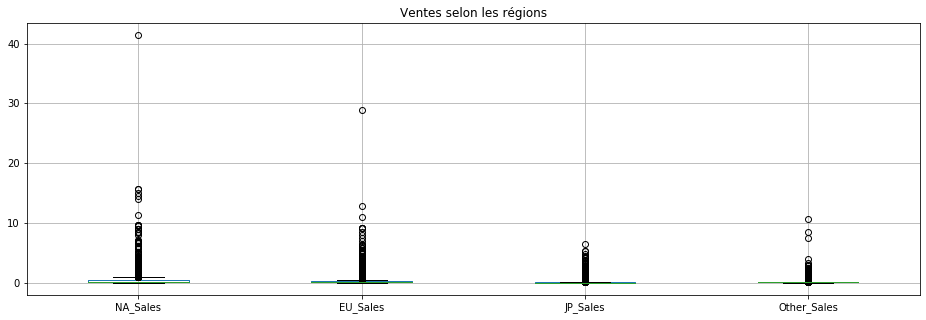

In [32]:
plt.figure(figsize=(16,5))
ventes_pays.boxplot()
plt.title("Ventes selon les régions")
plt.show()

Les utilisateurs notent sur 10 et non 100, donc les valeurs doivent être multiplié par 10

In [33]:
critiques = pd.DataFrame()
critiques['Critic_Score'] = ventes.Critic_Score
critiques['User_Score'] = ventes.User_Score*10
critiques.head()

,Critic_Score,User_Score
0,76.0,80.0
2,82.0,83.0
3,80.0,80.0
6,89.0,85.0
7,58.0,66.0


On peut voir sur le graph que les utilisateurs en moyennes donnent la même 

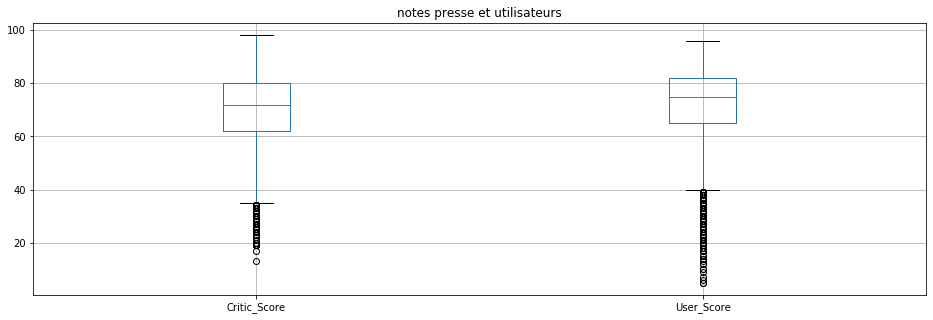

In [34]:
plt.figure(figsize=(16,5))
critiques.boxplot()
plt.title("notes presse et utilisateurs")
plt.show()

In [35]:
correlation = pd.DataFrame()
correlation['Critic_Score'] = ventes.Critic_Score
correlation['User_Score'] = ventes.User_Score*10
correlation['NA_Sales'] = ventes.NA_Sales
correlation['EU_Sales'] = ventes.EU_Sales
correlation['JP_Sales'] = ventes.JP_Sales
correlation['Other_Sales'] = ventes.Other_Sales
correlation.head()

,Critic_Score,User_Score,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,76.0,80.0,41.36,28.96,3.77,8.45
2,82.0,83.0,15.68,12.76,3.79,3.29
3,80.0,80.0,15.61,10.93,3.28,2.95
6,89.0,85.0,11.28,9.14,6.50,2.88
7,58.0,66.0,13.96,9.18,2.93,2.84


Correlation des ventes et des scores selon les régions

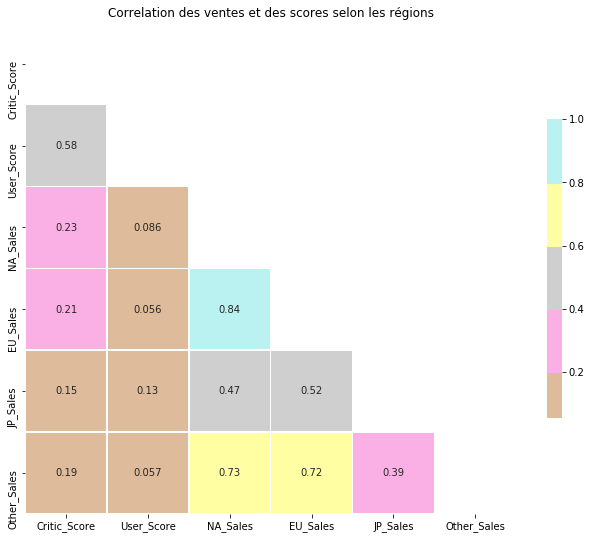

In [36]:
corr=correlation.corr()
corr_map=sea.color_palette("pastel")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 11))
sea.heatmap(corr, mask=mask, cmap=corr_map, vmax=1, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation des ventes et des scores selon les régions")
plt.show()